In [ ]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from atlas_vis import DKTAtlas62ROIPlotter

In [ ]:
## Surface Mapping for 62 rois ##
plotter_62  = DKTAtlas62ROIPlotter(
    cmap='Reds',
    clim=(0, 0.16),  
    window_size=(1200, 1000),
    nan_color='lightgray',
    background='white',
    template_key='pial'
)

df = pd.read_csv('C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/ucsf_results/lda_topic_atrophy_patterns.csv')
# print(df.columns)
print(len(df))
for col in df.columns[1:]:
    print(col)
    l_values = df.loc[:30,col].to_list()
    r_values = df.loc[31:,col].to_list()
    print(len(l_values))
    print(len(r_values))
    print(np.min(l_values+r_values))
    print(np.max(l_values+r_values))

    plotter_62(l_values, r_values, save_path=f'C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/ucsf_results/surface_maps/topicwise/{col}.png')

In [ ]:
plotter_62  = DKTAtlas62ROIPlotter(
    cmap='Reds',
    clim=(0.01, 0.03),  
    window_size=(1200, 1000),
    nan_color='lightgray',
    background='white',
    template_key='pial'
)

df = pd.read_csv('C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/ucsf_results/lda_diagnosis_atrophy_maps.csv')
# print(df.columns)
print(len(df))
for col in df.columns[1:]:
    print(col)
    l_values = df.loc[:30,col].to_list()
    r_values = df.loc[31:,col].to_list()
    print(len(l_values))
    print(len(r_values))
    print(np.min(l_values+r_values))
    print(np.max(l_values+r_values))

    plotter_62(l_values, r_values, save_path=f'C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/ucsf_results/surface_maps/diagnosiswise/{col}.png')

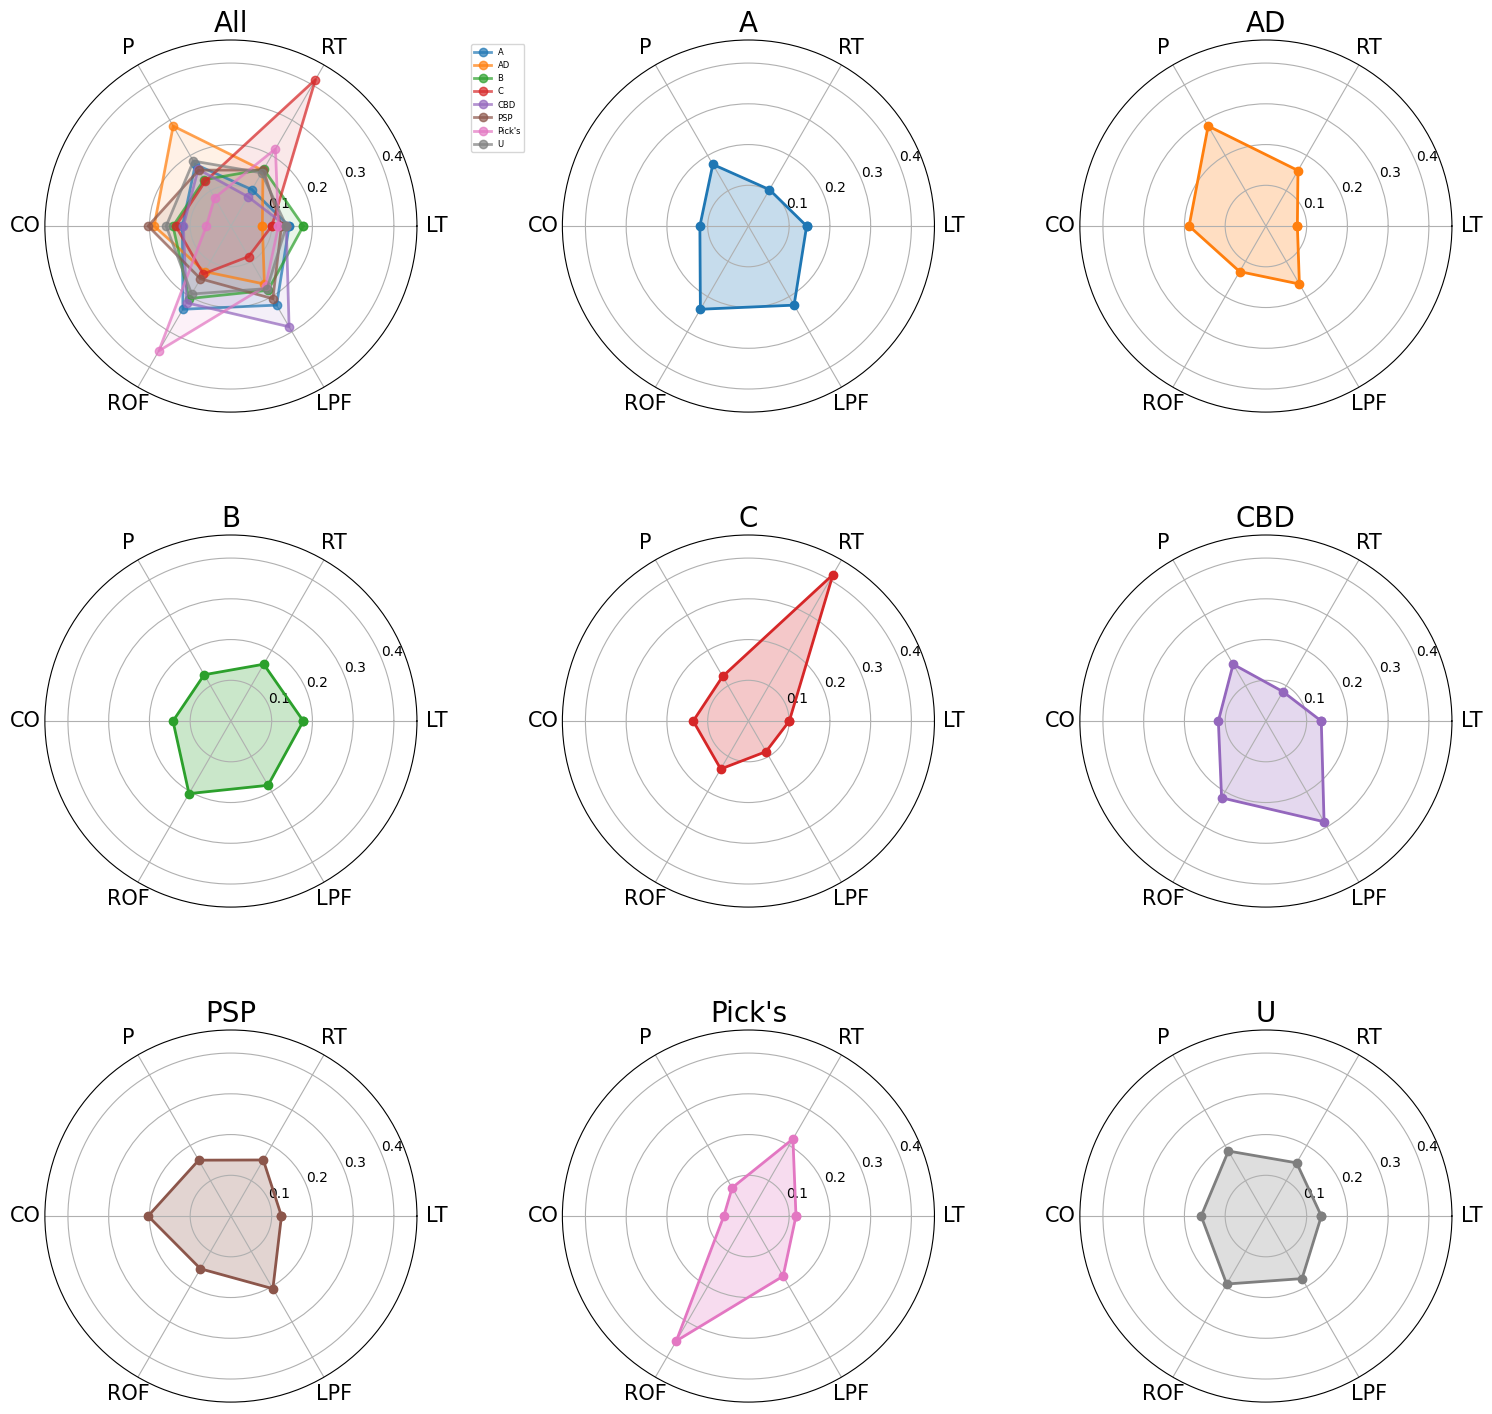

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/ucsf_results/lda_diagnosis_topic_expression.csv')
subjects = df.iloc[:, 0].values
categories = df.columns[1:].tolist()
data = df.iloc[:, 1:].values

# label_map = {'Topic_0': 'LT', 'Topic_1': 'Post', 'Topic_2': 'P', 'Topic_3': 'RTP', 'Topic_4': 'RPF', 'Topic_5': 'C',
#              'Topic_6': 'PC', 'Topic_7':'RT', 'Topic_8':'LOPF', 'Topic_9':'DPF'}
label_map = {'Topic_0': 'LT', 'Topic_1': 'RT', 'Topic_2': 'P', 'Topic_3': 'CO', 'Topic_4': 'ROF', 'Topic_5': 'LPF'}
labels = [label_map[cat] for cat in categories]
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Calculate grid size (add 1 for the combined plot)
n_subjects = len(subjects)
n_plots = n_subjects + 1  # +1 for combined plot
n_cols = 3
n_rows = int(np.ceil(n_plots / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows),subplot_kw=dict(polar=True))
axes = axes.flatten()

colors = plt.cm.tab10.colors

# First subplot: all subjects combined
ax = axes[0]
for idx, (subject, values) in enumerate(zip(subjects, data)):
    values_closed = values.tolist() + [values[0]]
    ax.plot(angles, values_closed, 'o-', linewidth=2, 
            color=colors[idx % len(colors)], label=subject, alpha=0.7)
    ax.fill(angles, values_closed, alpha=0.1, color=colors[idx % len(colors)])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, size=15)
ax.set_ylim(0, data.max() * 1.1)
ax.set_title('All', size=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=6)

# Remaining subplots: individual subjects
for idx, (subject, values) in enumerate(zip(subjects, data)):
    ax = axes[idx + 1]  # Offset by 1
    values_closed = values.tolist() + [values[0]]
    
    ax.plot(angles, values_closed, 'o-', linewidth=2, color=colors[idx % len(colors)])
    ax.fill(angles, values_closed, alpha=0.25, color=colors[idx % len(colors)])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, size=15)
    ax.set_ylim(0, data.max() * 1.1)
    ax.set_title(subject, size=20)

# Hide empty subplots
for idx in range(n_plots, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/ucsf_results/figures/spider_grid.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -------------------------------
# 1. Load coefficients
# -------------------------------

coef_df = pd.read_csv(
    "C:/Users/BREIN/Desktop/copathology_visualization_temp/lda_with_reg/ucsf_results/topic_diagnosis_coefficients.csv",
    index_col=0
)

# -------------------------------
# 2. Reorder topics by importance (optional)
# -------------------------------

topic_order = coef_df.abs().mean(axis=0).sort_values(ascending=False).index
coef_df = coef_df[topic_order]

# -------------------------------
# 3. Map topic labels
# -------------------------------

label_map = {'Topic_0': 'LT', 'Topic_1': 'Post', 'Topic_2': 'P', 'Topic_3': 'RTP', 'Topic_4': 'RPF', 'Topic_5': 'C',
             'Topic_6': 'PC', 'Topic_7':'RT', 'Topic_8':'LOPF', 'Topic_9':'DPF'}
# label_map = {'Topic_0': 'LT', 'Topic_1': 'RT', 'Topic_2': 'P', 'Topic_3': 'CO', 'Topic_4': 'ROF', 'Topic_5': 'LPF'}

new_labels = [label_map[t] for t in coef_df.columns]
coef_df.columns = new_labels

# -------------------------------
# 4. Plot heatmap
# -------------------------------

plt.figure(figsize=(1.2 * coef_df.shape[1], 0.8 * coef_df.shape[0]))

sns.heatmap(
    coef_df,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Regression Coefficient (β)"}
)

plt.xlabel("Latent Atrophy Patterns (Topics)")
plt.ylabel("Diagnosis")
plt.title("Multinomial Regression Coefficients\n(Topic → Diagnosis Association)")
plt.tight_layout()
plt.savefig('C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/ucsf_results/figures/regression_coefficients.png', dpi=150, bbox_inches='tight')
plt.show()


KeyError: 'Topic_7'

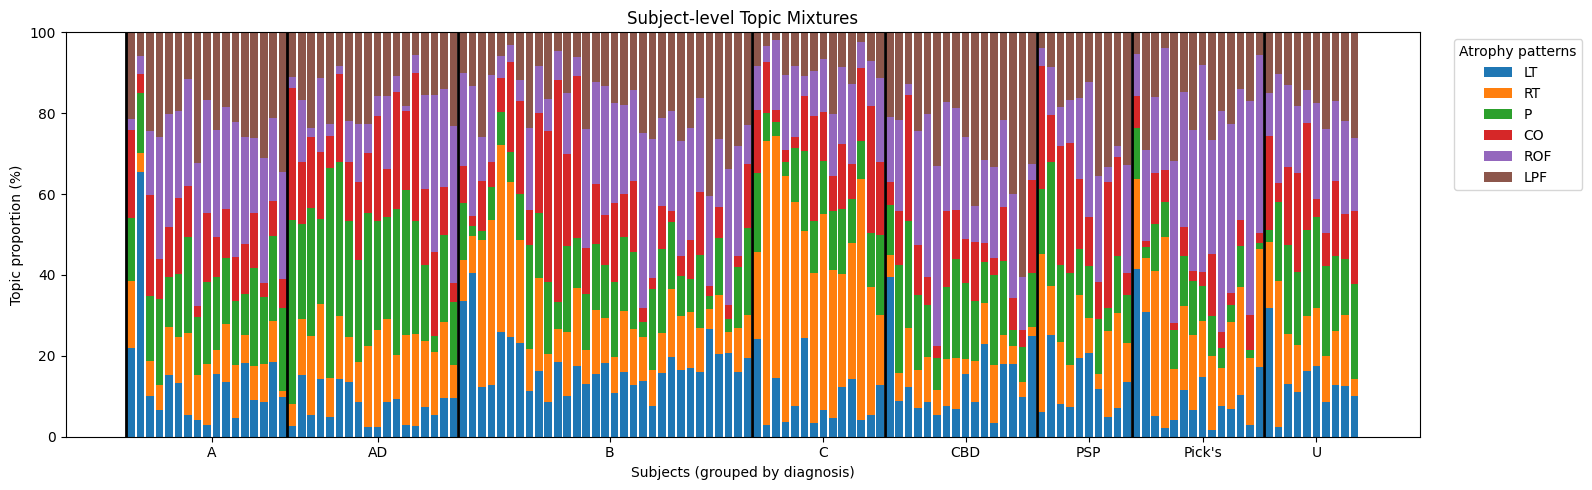

In [13]:
csv_path = (
    "C:/Users/BREIN/Desktop/copathology_visualization_temp/"
    "vanilla_LDA/ucsf_results/lda_subject_topic_weights.csv"
)

theta_df = pd.read_csv(csv_path)
topic_cols = [c for c in theta_df.columns if c.startswith("Topic_")]
label_map = {'Topic_0': 'LT', 'Topic_1': 'RT', 'Topic_2': 'P', 'Topic_3': 'CO', 'Topic_4': 'ROF', 'Topic_5': 'LPF'}


# -------------------------------
# 3. Convert topic weights to %
# -------------------------------

theta_pct = theta_df[topic_cols].values
theta_pct = theta_pct / theta_pct.sum(axis=1, keepdims=True) * 100

dx = theta_df["DX"].values

# -------------------------------
# 4. Sort subjects by DX, then dominant topic
# -------------------------------

dominant_topic = np.argmax(theta_pct, axis=1)

sort_df = pd.DataFrame({
    "DX": dx,
    "dominant_topic": dominant_topic
})

sort_idx = (
    sort_df
    .sort_values(["DX", "dominant_topic"])
    .index
)

theta_sorted = theta_pct[sort_idx]
dx_sorted = dx[sort_idx]

# -------------------------------
# 5. Plot stacked percentage bars
# -------------------------------

fig, ax = plt.subplots(figsize=(16, 5))

x = np.arange(theta_sorted.shape[0])
bottom = np.zeros(theta_sorted.shape[0])

# Use topic order as defined in label_map
ordered_topics = list(label_map.keys())

for topic in ordered_topics:
    k = topic_cols.index(topic)
    display_label = label_map[topic]

    ax.bar(
        x,
        theta_sorted[:, k],
        bottom=bottom,
        label=display_label
    )
    bottom += theta_sorted[:, k]

# -------------------------------
# 6. Add diagnosis separators and labels
# -------------------------------

unique_dx = pd.unique(dx_sorted)

start = 0
dx_centers = []

for d in unique_dx:
    count = np.sum(dx_sorted == d)
    center = start + count / 2
    dx_centers.append((d, center))

    ax.axvline(start - 0.5, color="black", linewidth=2)
    start += count

# ax.axvline(start - 0.5, color="black", linewidth=2)

# -------------------------------
# 7. Final formatting
# -------------------------------

ax.set_ylim(0, 100)
ax.set_ylabel("Topic proportion (%)")
ax.set_xlabel("Subjects (grouped by diagnosis)")
ax.set_title("Subject-level Topic Mixtures")
ax.set_xticks([c[1] for c in dx_centers])
ax.set_xticklabels([c[0] for c in dx_centers])
ax.legend(
    title="Atrophy patterns",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)
plt.tight_layout()
plt.savefig('C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/ucsf_results/figures/subject_topic_proportions.png')
plt.show()


In [14]:
# ============================================================
# XGBoost Multiclass Classification with 5-Fold CV
# Using LDA Topic Weights (Out-of-Fold Ensemble Predictions)
# ============================================================

import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

# -------------------------
# 1. Load data
# -------------------------
theta_df = pd.read_csv(
    "C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/ucsf_results/lda_subject_topic_weights.csv"
)

topic_cols = [c for c in theta_df.columns if c.startswith("Topic_")]
X = theta_df[topic_cols].values
y = theta_df["DX"].values
subject_idx = theta_df.index.values

# Encode DX labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
dx_classes = le.classes_

print("DX classes:", dx_classes)

# -------------------------
# 2. Stratified 5-fold CV
# -------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_y_true = []
all_y_pred = []
all_y_proba = []
all_idx = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_encoded), 1):
    print(f"\n===== Fold {fold} =====")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    xgb = XGBClassifier(
        objective="multi:softprob",
        num_class=len(dx_classes),
        eval_metric="mlogloss",
        use_label_encoder=False,
        random_state=42
    )

    xgb.fit(X_train, y_train)

    y_pred = xgb.predict(X_test)
    y_proba = xgb.predict_proba(X_test)

    all_y_true.append(y_test)
    all_y_pred.append(y_pred)
    all_y_proba.append(y_proba)
    all_idx.append(subject_idx[test_idx])

# -------------------------
# 3. Aggregate CV results
# -------------------------
y_true_all = np.concatenate(all_y_true)
y_pred_all = np.concatenate(all_y_pred)
y_proba_all = np.vstack(all_y_proba)
idx_all = np.concatenate(all_idx)

# -------------------------
# 4. Metrics (CV-aggregated)
# -------------------------
print("\n===== CV-Aggregated Classification Report =====")
print(
    classification_report(
        y_true_all,
        y_pred_all,
        target_names=dx_classes
    )
)

cm = confusion_matrix(y_true_all, y_pred_all)
accuracy = np.trace(cm) / np.sum(cm)

print("CV Accuracy:", round(accuracy, 4))
print("Confusion Matrix:\n", cm)

# -------------------------
# 5. Build final results DataFrame
# -------------------------
results_df = pd.DataFrame(
    y_proba_all,
    columns=[f"P({dx})" for dx in dx_classes]
)

results_df["DX_true"] = le.inverse_transform(y_true_all)
results_df["DX_pred"] = le.inverse_transform(y_pred_all)
results_df["subject_index"] = idx_all

# Sort by true DX for visualization
results_df = results_df.sort_values("DX_true").reset_index(drop=True)

# -------------------------
# 6. Save results
# -------------------------
out_path = (
    "C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/ucsf_results/xgb_5fold_cv_test_predictions.csv"
)
results_df.to_csv(out_path, index=False)

print("\nSaved CV predictions to:")
print(out_path)


DX classes: ['A' 'AD' 'B' 'C' 'CBD' 'PSP' "Pick's" 'U']

===== Fold 1 =====

===== Fold 2 =====


c:\Users\BREIN\anaconda3\envs\data_management\lib\site-packages\xgboost\training.py:183: UserWarning: [21:18:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== Fold 3 =====

===== Fold 4 =====

===== Fold 5 =====


c:\Users\BREIN\anaconda3\envs\data_management\lib\site-packages\xgboost\training.py:183: UserWarning: [21:18:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== CV-Aggregated Classification Report =====
              precision    recall  f1-score   support

           A       0.21      0.24      0.22        17
          AD       0.69      0.61      0.65        18
           B       0.39      0.39      0.39        31
           C       0.65      0.79      0.71        14
         CBD       0.21      0.25      0.23        16
         PSP       0.25      0.10      0.14        10
      Pick's       0.58      0.50      0.54        14
           U       0.17      0.20      0.18        10

    accuracy                           0.40       130
   macro avg       0.39      0.38      0.38       130
weighted avg       0.41      0.40      0.40       130

CV Accuracy: 0.4
Confusion Matrix:
 [[ 4  1  4  0  5  1  1  1]
 [ 1 11  1  1  2  0  1  1]
 [ 6  1 12  2  4  1  1  4]
 [ 0  0  1 11  0  1  0  1]
 [ 4  2  3  0  4  0  2  1]
 [ 1  1  3  1  2  1  0  1]
 [ 1  0  2  1  2  0  7  1]
 [ 2  0  5  1  0  0  0  2]]

Saved CV predictions to:
C:/Users/BREIN/Deskto

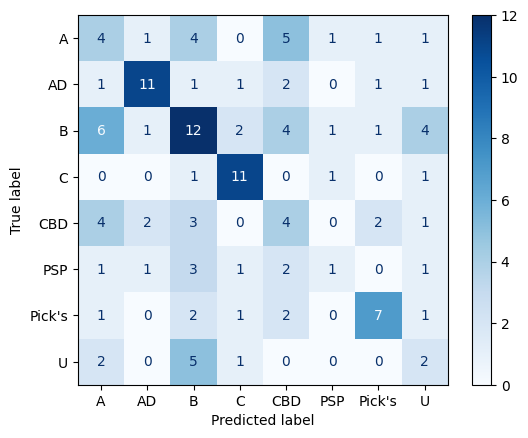

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')  # or normalize=True for % values


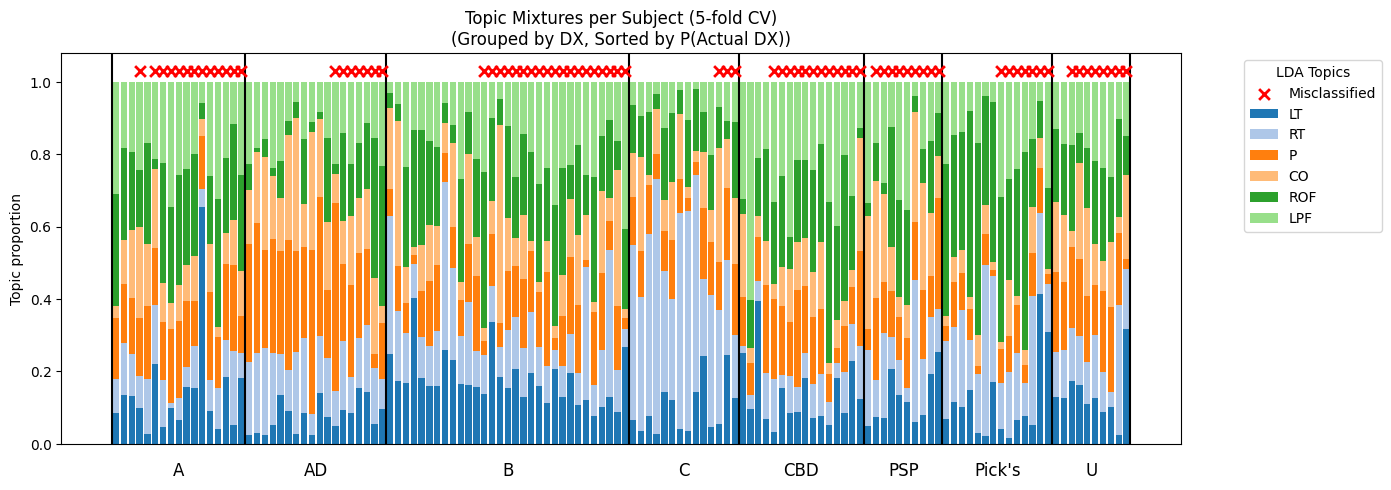

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------
# 1. Merge CV results with topic mixtures
# ---------------------------------
plot_df = theta_df.loc[results_df["subject_index"]].copy()

plot_df["DX_true"] = results_df["DX_true"].values
plot_df["DX_pred"] = results_df["DX_pred"].values

# ---------------------------------
# 2. Compute P(true DX) per subject
# ---------------------------------
proba_cols = [c for c in results_df.columns if c.startswith("P(")]

plot_df["p_true_dx"] = [
    results_df.iloc[i][f"P({dx})"]
    for i, dx in enumerate(plot_df["DX_true"])
]

# ---------------------------------
# 3. Sort subjects:
#    group by true DX, then by P(true DX)
# ---------------------------------
plot_df = plot_df.sort_values(
    ["DX_true", "p_true_dx"],
    ascending=[True, False]
).reset_index(drop=True)

# ---------------------------------
# 4. Plot stacked topic mixtures
# ---------------------------------
label_map = {
    'Topic_0': 'LT',
    'Topic_1': 'RT',
    'Topic_2': 'P',
    'Topic_3': 'CO',
    'Topic_4': 'ROF',
    'Topic_5': 'LPF'
}

topic_cols = [c for c in plot_df.columns if c.startswith("Topic_")]

fig, ax = plt.subplots(figsize=(14, 5))

bottom = np.zeros(len(plot_df))
colors = sns.color_palette("tab20", len(topic_cols))

for i, topic in enumerate(topic_cols):
    ax.bar(
        np.arange(len(plot_df)),
        plot_df[topic],
        bottom=bottom,
        color=colors[i],
        label=label_map.get(topic, topic)
    )
    bottom += plot_df[topic].values

# ---------------------------------
# 5. Axis styling
# ---------------------------------
ax.set_xticks([])
ax.set_ylabel("Topic proportion")
ax.set_ylim(0, 1.08)  # <-- CRITICAL FIX
ax.set_title(
    "Topic Mixtures per Subject (5-fold CV)\n"
    "(Grouped by DX, Sorted by P(Actual DX))"
)

# ---------------------------------
# 6. DX group labels & separators
# ---------------------------------
current = 0
for dx in plot_df["DX_true"].unique():
    count = (plot_df["DX_true"] == dx).sum()

    ax.text(
        current + count / 2 - 0.5,
        -0.05,
        dx,
        ha="center",
        va="top",
        fontsize=12
    )

    ax.axvline(current - 0.5, color="black", linewidth=1.5)
    current += count

ax.axvline(current - 0.5, color="black", linewidth=1.5)

# ---------------------------------
# 7. Mark misclassified subjects
# ---------------------------------
misclassified = plot_df["DX_true"] != plot_df["DX_pred"]

ax.scatter(
    np.where(misclassified)[0],
    np.ones(misclassified.sum()) * 1.03,
    color="red",
    marker="x",
    s=60,
    linewidths=2,
    label="Misclassified",
    zorder=10
)

# ---------------------------------
# 8. Legend & layout
# ---------------------------------
ax.legend(
    title="LDA Topics",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


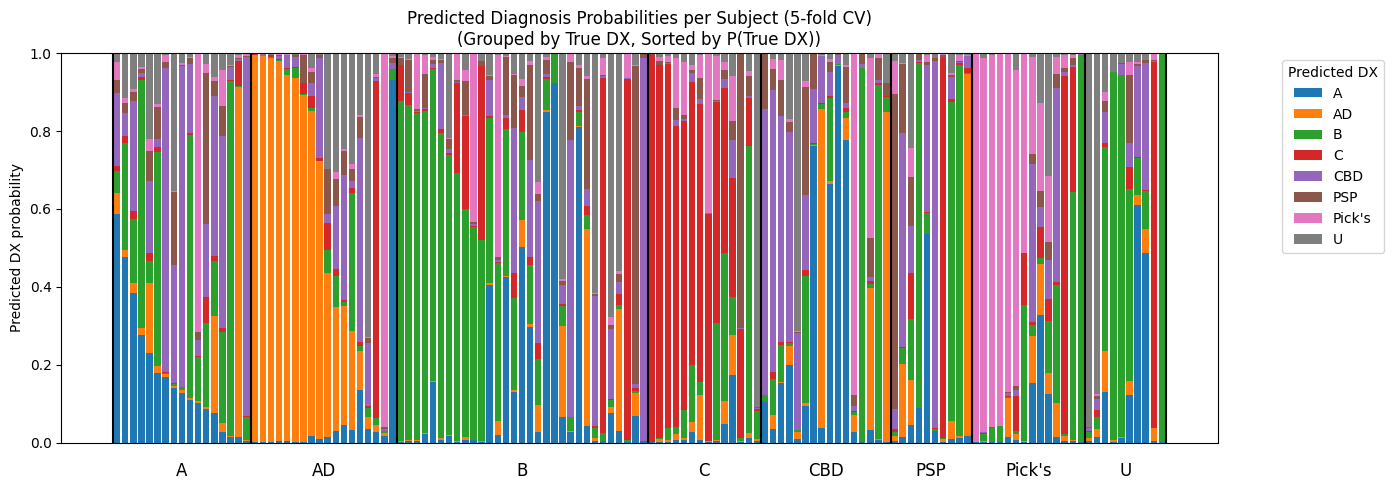

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------
# 1. Prepare probability columns
# ---------------------------------
proba_cols = [c for c in results_df.columns if c.startswith("P(")]
dx_labels = [c.replace("P(", "").replace(")", "") for c in proba_cols]

# Align probabilities to plot_df order
df = results_df.loc[plot_df.index, proba_cols].copy()
df["DX_true"] = plot_df["DX_true"].values
df["DX_pred"] = plot_df["DX_pred"].values

# ---------------------------------
# 2. Sort subjects:
#    group by true DX,
#    within group sort by P(true DX)
# ---------------------------------
sorted_blocks = []

for dx in df["DX_true"].unique():
    dx_block = df[df["DX_true"] == dx].copy()

    true_dx_col = f"P({dx})"
    if true_dx_col not in dx_block.columns:
        raise ValueError(f"Missing probability column: {true_dx_col}")

    dx_block = dx_block.sort_values(
        by=true_dx_col,
        ascending=False
    )

    sorted_blocks.append(dx_block)

proba_plot_df = (
    pd.concat(sorted_blocks)
    .reset_index(drop=True)
)

# ---------------------------------
# 3. Stacked bar plot
# ---------------------------------
fig, ax = plt.subplots(figsize=(14, 5))

bottom = np.zeros(len(proba_plot_df))
colors = sns.color_palette("tab10", len(dx_labels))

for i, (dx, col) in enumerate(zip(dx_labels, proba_cols)):
    ax.bar(
        np.arange(len(proba_plot_df)),
        proba_plot_df[col],
        bottom=bottom,
        color=colors[i],
        label=dx
    )
    bottom += proba_plot_df[col].values

ax.set_xticks([])
ax.set_ylabel("Predicted DX probability")
ax.set_ylim(0, 1)
ax.set_title(
    "Predicted Diagnosis Probabilities per Subject (5-fold CV)\n"
    "(Grouped by True DX, Sorted by P(True DX))"
)

# ---------------------------------
# 4. Add DX group labels & separators
# ---------------------------------
current = 0

for dx in proba_plot_df["DX_true"].unique():
    count = (proba_plot_df["DX_true"] == dx).sum()

    ax.text(
        current + count / 2 - 0.5,
        -0.05,
        dx,
        ha="center",
        va="top",
        fontsize=12
    )

    ax.axvline(current - 0.5, color="black", linewidth=1.5)
    current += count

ax.axvline(current - 0.5, color="black", linewidth=1.5)

ax.legend(
    title="Predicted DX",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


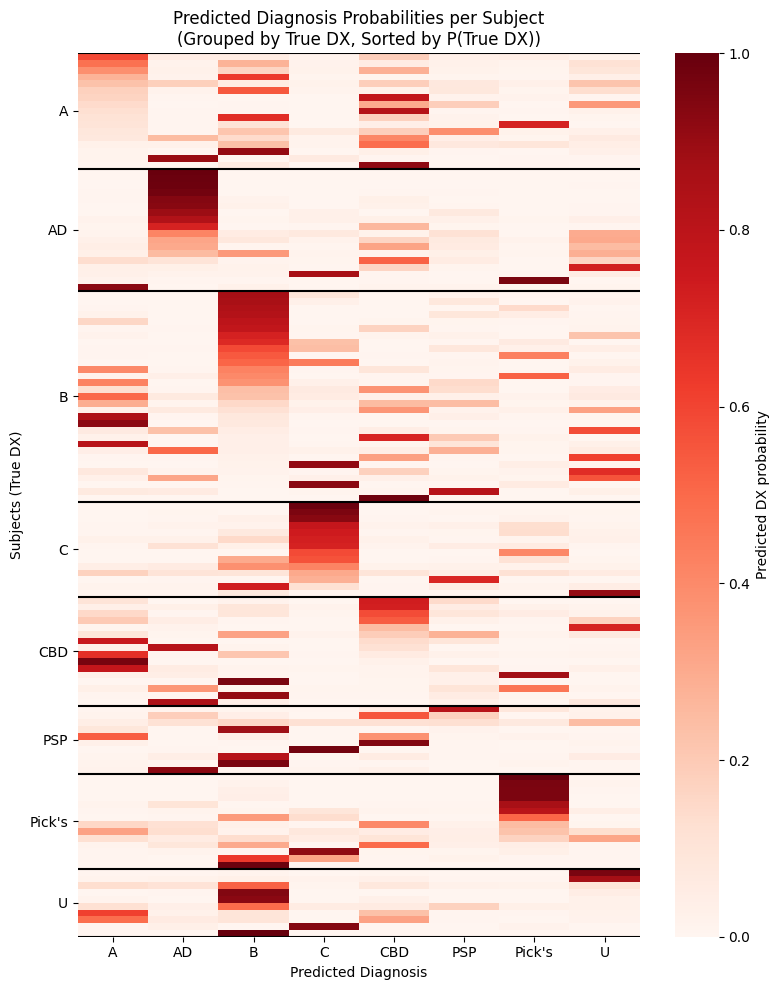

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------
# 1. Prepare probability columns
# ---------------------------------
proba_cols = [c for c in proba_plot_df.columns if c.startswith("P(")]
dx_labels = [c.replace("P(", "").replace(")", "") for c in proba_cols]

df = proba_plot_df.copy()

# ---------------------------------
# 2. Sort subjects:
#    - group by true DX
#    - within group, sort by P(true DX) descending
# ---------------------------------
sorted_blocks = []

for dx in df["DX_true"].unique():
    dx_block = df[df["DX_true"] == dx].copy()

    true_dx_col = f"P({dx})"
    if true_dx_col not in dx_block.columns:
        raise ValueError(f"Missing probability column: {true_dx_col}")

    dx_block = dx_block.sort_values(
        by=true_dx_col,
        ascending=False
    )

    sorted_blocks.append(dx_block)

df_sorted = pd.concat(sorted_blocks).reset_index(drop=True)

# ---------------------------------
# 3. Heatmap data
# ---------------------------------
heatmap_data = df_sorted[proba_cols].values

# ---------------------------------
# 4. Plot heatmap
# ---------------------------------
plt.figure(figsize=(8, 10))

ax = sns.heatmap(
    heatmap_data,
    cmap="Reds",
    vmin=0,
    vmax=1,
    cbar_kws={"label": "Predicted DX probability"},
    yticklabels=False,
    xticklabels=dx_labels
)

ax.set_xlabel("Predicted Diagnosis")
ax.set_ylabel("Subjects (True DX)")
ax.set_title(
    "Predicted Diagnosis Probabilities per Subject\n"
    "(Grouped by True DX, Sorted by P(True DX))"
)

# ---------------------------------
# 5. Add true DX group labels + lines
# ---------------------------------
current = 0
yticks = []
ylabels = []

for dx in df_sorted["DX_true"].unique():
    count = (df_sorted["DX_true"] == dx).sum()
    midpoint = current + count / 2

    yticks.append(midpoint)
    ylabels.append(dx)

    ax.hlines(
        current,
        xmin=0,
        xmax=len(dx_labels),
        colors="black",
        linewidth=1.5
    )

    current += count

# Final boundary
ax.hlines(
    current,
    xmin=0,
    xmax=len(dx_labels),
    colors="black",
    linewidth=1.5
)

ax.set_yticks(yticks)
ax.set_yticklabels(ylabels, rotation=0)

plt.tight_layout()
plt.show()
